<a href="https://colab.research.google.com/github/arpanastanley24/OIBSIP/blob/main/oibsip_taskno3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF THE SALES WITH RESPECT TO ADVERTISING COSTS**

**Description:**

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

**Acknowledgement:**

The dataset is taken from Kaggle

**Objective:**

Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t a single & multiple features.
Also evaluate the models & compare their respective scores like R2, MSE, etc.

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import the dataset
data = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

#Retrieves first 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#Columns in the dataset
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#Removing a variable
df = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Data types of features
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
#Checking for null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 200 rows , 4 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#Summary measure
df.describe().T.style.background_gradient(cmap='YlGnBu')

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales,200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


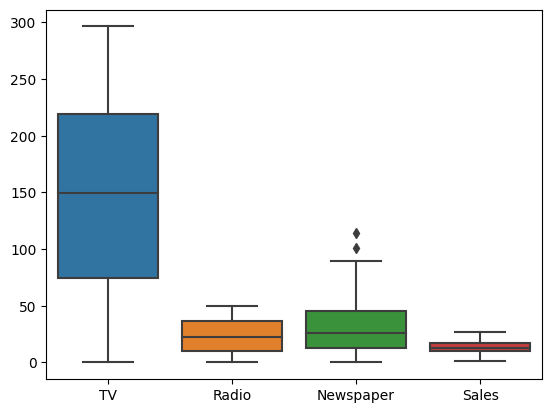

In [ ]:
#Checking for outliers
sns.boxplot(df)
plt.show()

Newspaper colummn has little outlier, so removing upto 5% data will effect our dataset

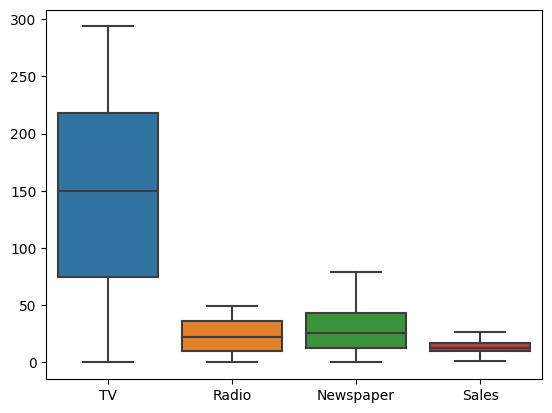

In [ ]:
#Removing outliers
Newspaper_sales=df["Newspaper"].quantile(0.98)
df2=df[df["Newspaper"]<Newspaper_sales]
sns.boxplot(df2)
plt.show()

In [ ]:
#Number of lost rows
print('Number of rows lost: ',df.shape[0]-df2.shape[0])

Number of rows lost:  4


<Axes: ylabel='Count'>

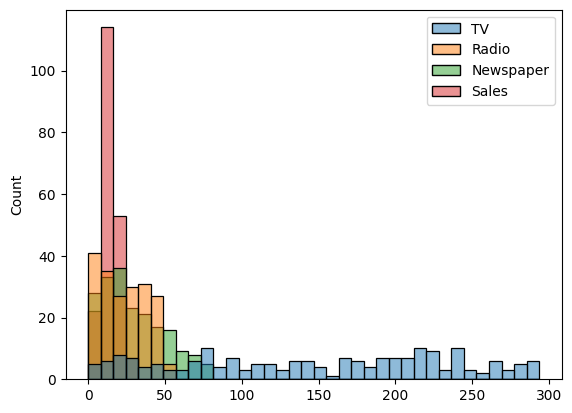

In [ ]:
#Plotting histogram
sns.histplot(df2)

<Axes: >

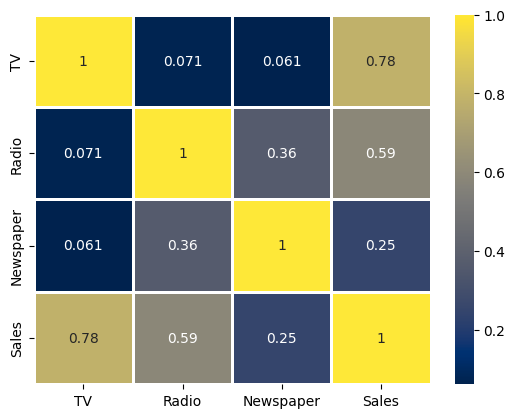

In [ ]:
#Correlation between the features
sns.heatmap(df2.corr(), cmap="cividis", annot=True, linewidth=2)

Text(0.5, 1.0, 'The Regression Line Of Newspaper Vs Sales')

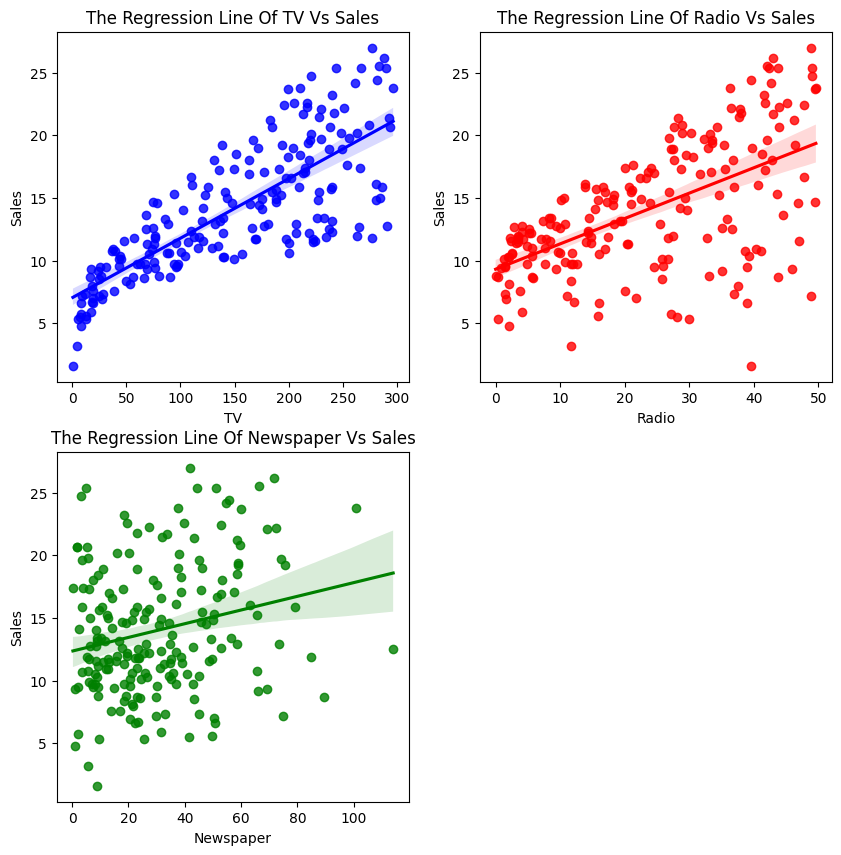

In [ ]:
# Plotting the regression line
plt.figure(figsize =(10,10))

plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of TV Vs Sales')

plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of Radio Vs Sales')

plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='g').set_title('The Regression Line Of Newspaper Vs Sales')

In [ ]:
#Choosing the independent variables
x = df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
#Choosing the target variable
y = df['Sales']
np.array(y)

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

# **TRAINING VALIDATION AND TEST SETS**

In [ ]:
#Train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 1)

In [ ]:
#Size of the train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# **MODEL BUILDING**

## **LINEAR REGRESSION**

* Linear regression is one of the easiest and most popular Machine Learning algorithms.

* It is a statistical method that is used for predictive analysis.

* Linear regression algorithm shows a linear relationship between a dependent and one or more independent variables.

* Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

In [ ]:
#Building the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_lr))
print('MSE: ',(mean_squared_error(y_test,y_pred_lr))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_lr))
print('-------------------------------------')
print("Cofficient",lr.coef_)
print("Intercept",lr.intercept_)

R squared:  0.9156213613792232
MSE:  1.404651423032895
RMSE:  1.185179911672863
MAE:  1.0668917082595213
-------------------------------------
Cofficient [0.04656457 0.17915812 0.00345046]
Intercept 2.87696662231793


## **DECISION TREE REGRESSOR**

* Decision tree builds regression or classification models in the form of a tree structure.

* It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

* The final result is a tree with decision nodes and leaf nodes.

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

In [ ]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_dtr))
print('MSE: ',(mean_squared_error(y_test,y_pred_dtr))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_dtr))

R squared:  0.9572856383094281
MSE:  0.999399819891919
RMSE:  1.185179911672863
MAE:  0.68


## **RANDOM TREE REGRESSOR**

* Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression.

* Random Forest is a regressor that contains a number of decision trees on various subsets of the given dataset and takes the majority to improve the accuracy of that dataset.

* A Random Forest Regression model is powerful and accurate.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_rfr))
print('MSE: ',(mean_squared_error(y_test,y_pred_rfr))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_rfr))

R squared:  0.9823264641386675
MSE:  0.6428564847615674
RMSE:  1.185179911672863
MAE:  0.5100599999999996


### **Random Forest Regressor performs with the highest accuarcy**

# **HYPERPARAMETER TUNING**

## **RANDOM TREE REGRESSOR**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.4f}")

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9703


# **FINAL MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R squared: ',r2_score(y_test,y_pred_rfr))
print('MSE: ',(mean_squared_error(y_test,y_pred_rfr))**0.5)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred_lr))**0.5)
print('MAE: ',mean_absolute_error(y_test, y_pred_rfr))

R squared:  0.9812546317438489
MSE:  0.66206296516305
MAE:  0.5252896846764404
